# 1.3 Computing the biased CVs

In [110]:
## import required packages
import os, math, sys
import numpy as np
import matplotlib.pyplot as plt
import simtk.openmm.app  as omm_app
import simtk.openmm as omm
import simtk.unit as unit
from tqdm import tqdm
import mdtraj
from FastMBAR import *
from tqdm.notebook import tqdm_notebook

In [111]:
M = 15

In [112]:
topology = mdtraj.load_psf('toppar/step3_input.psf')

all_dists = []
for window in range(M):
    #traj = mdtraj.load_dcd(f"trajectories/long_traj/traj_{window+1}_long_US.dcd", topology)
    traj = mdtraj.load_dcd(f"trajectories/traj_win{window+1}_US.dcd", topology)
    dist = mdtraj.compute_distances(traj, [[0, 1]])
    np.savetxt(f"output_files/dist_win_{window+1}.csv", dist, fmt = "%.5f", delimiter = ",")
    all_dists.append(dist.T[0])
    
all_dists = np.array(all_dists)*10

Text(0.5, 0, 'Steps')

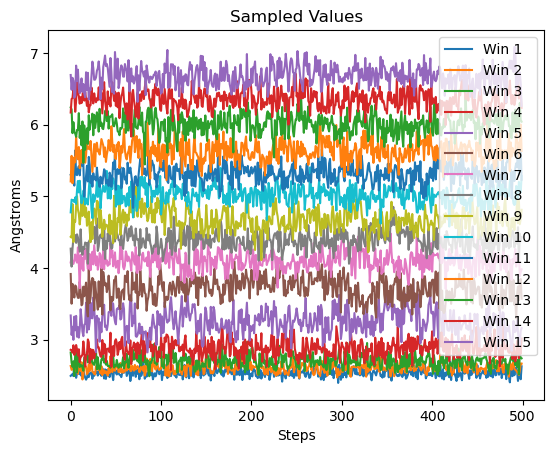

In [113]:
plt.title("Sampled Values")
for window in range(M):
    plt.plot(all_dists[window], label=f"Win {window+1}")
plt.legend()
plt.ylabel("Angstroms")
plt.xlabel("Steps")

Text(0.5, 0, 'Distance in Angstroms')

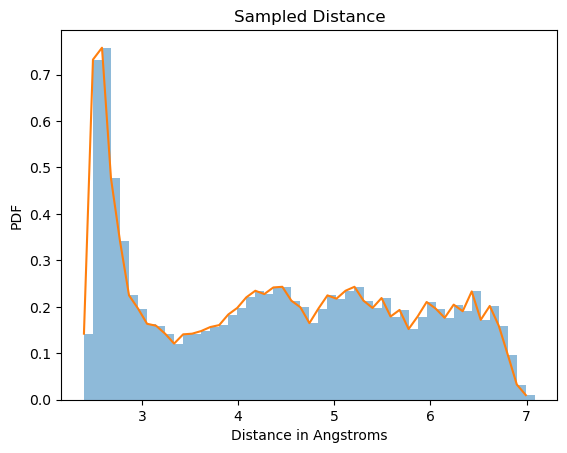

In [114]:
plt.title("Sampled Distance")
counts, bins, _ = plt.hist(np.concatenate(all_dists), bins=50, density=True, alpha=0.5)
plt.plot(bins[:-1], counts)
plt.ylabel("PDF")
plt.xlabel("Distance in Angstroms")

Text(0.5, 0, 'Distance in Angstroms')

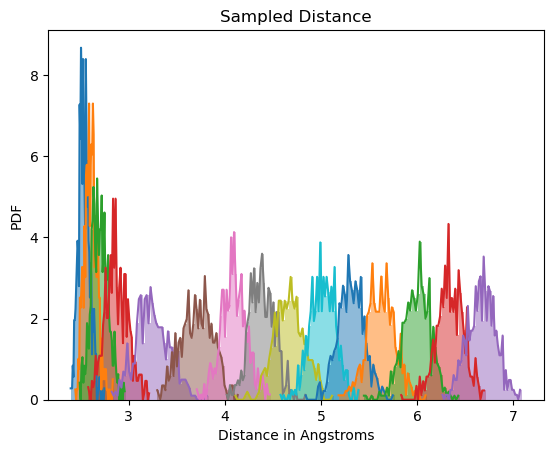

In [115]:
plt.title("Sampled Distance")

#fig, ax = plt.subplots(3, 2)
for n, dist in enumerate(all_dists):
    #plt.figure()
    counts, bins, _ = plt.hist(dist, bins=50, density=True, alpha=0.5, color=f"C{n}")
    plt.plot(bins[:-1], counts, c=f"C{n}")
plt.ylabel("PDF")
plt.xlabel("Distance in Angstroms")

In [49]:
ax[0]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)